In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r"E:\NLP\sentimental_analysis_flight_reviews.csv")
df.head()

,airline_sentiment,airline,text
0,positive,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,positive,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


# Data Pre-Processing

Mapping categories to numbers

In [3]:
df.airline_sentiment = df.airline_sentiment.map({"positive":1, "negative":0})

df.airline = df.airline.map({"Virgin America":2, "United":1})

In [4]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

1. Creating my own stopwords since using stopwords by nltk remove words like not, no, didn't, haven't, shouldn't, which are important in sentiment analysis.

2. using regex to replace "didn't" or "didnt" with "did not" and such.

3. Removing "@" cals from the tweet.

4. Removing non alpha-numeric characters.

5. Removing double spaces.

6. Lemmatizing every word and then stemming it for every review.

7. Removing words with 1 letter like "a", "i".

In [5]:
my_stopwords = ["is", "am","an", "are", "of","can", "were", "he", "she", "him", "her", "his", "me", "in", "was", "will", "being", "have", "has", "had", 
                "also", "to", "for", "the", "we", "you", "by", "during", "on", "us", "my", "mine", "our", "it","those", "be",
                "that", "would", "this", "there", "youd", "who","then", "they", "them", "as"]
def clean_review(review):
    review=re.sub("(n\'t)|(\w+nt)"," not",review)
    review=re.sub("(\@\w+)","",review)
    review=re.sub("[^a-zA-Z]"," ",review)
    review=re.sub("\s\s"," ",review)

    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    # ps=Stemmer()
    # ps=SnowballStemmer(language="english")
    lemma = nltk.wordnet.WordNetLemmatizer()
    
    review=[ps.stem(lemma.lemmatize(word)) for word in review if ((word not in my_stopwords))]
    review = [word for word in review if len(word) > 1]
    # review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    return review

In [6]:
df["processed_review"] = df.text.apply(clean_review)
df.head()

,airline_sentiment,airline,text,processed_review
0,1,2,@VirginAmerica What @dhepburn said.,what said
1,1,2,@VirginAmerica plus you've added commercials t...,plu ve ad commerci experi tacki
2,1,2,@VirginAmerica I didn't today... Must mean I n...,did not today must mean need take anoth trip
3,0,2,@VirginAmerica it's really aggressive to blast...,realli aggress blast obnoxi not your guest fac...
4,0,2,@VirginAmerica and it's a really big bad thing...,and realli big bad thing about


In [7]:
X = df.processed_review
y = df.airline_sentiment

In [8]:
X.shape

(514,)

Random sample of 5 processed reviews

In [9]:
df.processed_review.sample(5).tolist()

['veri understand and help out thx comp',
 'note not at design silver statu check line close assist all paseng',
 'done and done best airlin around hand down',
 'omg final',
 'thank easi itinerari shift impend weather quick painless amp free']

Train test split and using shuffle

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, shuffle=True, random_state=39)


Vectorizing a review into 1200 features

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv=TfidfVectorizer(max_features=1200)

X_train=cv.fit_transform(X_train)
X_test=cv.transform(X_test)

# Training the model

Using a neural network that more or less mimics logistic regression 

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from keras.layers import InputLayer, Dense, Activation, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Dense(1200, input_shape=X_train.shape[1:], activation="sigmoid"))

model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# classifier = XGBClassifier(n_estimators=3000, max_depth=30)
# classifier=RandomForestClassifier(n_estimators=3000)
# classifier=LogisticRegression(random_state=2020)
# classifier=DecisionTreeClassifier()

# classifier.fit(X_train,y_train)
model.fit(X_train, y_train, epochs=25)


C:\Users\DELL\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\DELL\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/25
385/385 [==============================] - 2s 4ms/step - loss: 0.6722 - acc: 0.6208
Epoch 2/25
385/385 [==============================] - 1s 2ms/step - loss: 0.6479 - acc: 0.6286
Epoch 3/25
385/385 [==============================] - 1s 2ms/step - loss: 0.6346 - acc: 0.5948
Epoch 4/25
385/385 [==============================] - 1s 2ms/step - loss: 0.5665 - acc: 0.8545
Epoch 5/25
385/385 [==============================] - 1s 2ms/step - loss: 0.5393 - acc: 0.6364
Epoch 6/25
385/385 [==============================] - 1s 2ms/step - loss: 0.5133 - acc: 0.9065A: 0s - loss: 0.5196 - ac
Epoch 7/25
385/385 [==============================] - 1s 2ms/step - loss: 0.4668 - acc: 0.9117
Epoch 8/25
385/385 [==============================] - 1s 2ms/step - loss: 0.4501 - acc: 0.7714
Epoch 9/25
385/385 [==============================] - 1s 2ms/step - loss: 0.4214 - acc: 0.8701
Epoch 10/25
385/385 

# Predicting and analyzing accuracy metrics

In [13]:
# y_pred=classifier.predict(X_test)
y_pred=model.predict(X_test)


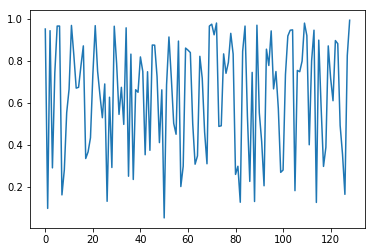

In [14]:
plt.plot(y_pred)

In [15]:
y_pred_activated = y_pred >= 0.5

Confusion matrix to understand type 1 and type 2 errors

In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_activated)
cm

array([[29, 14],
       [13, 73]], dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(classification_report(y_test,y_pred_activated))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68        43
           1       0.84      0.85      0.84        86

   micro avg       0.79      0.79      0.79       129
   macro avg       0.76      0.76      0.76       129
weighted avg       0.79      0.79      0.79       129



In [18]:
print(accuracy_score(y_test,y_pred_activated))

0.7906976744186046
